# Pre-processing data


## Reading data

In [1]:
import pandas as pd
import numpy as np
import csv
df =pd.read_csv("base_original_completa.csv", sep = ';',low_memory=False)
df.ndim

2

In [2]:
target = dataframe['M282_ABOR']

NameError: name 'dataframe' is not defined

## Selecting data


In [2]:
dataframe = df[df['M282_ABOR'] != '?']
dataframe = dataframe[dataframe['M282_ABOR'] != '95']
dataframe = dataframe[dataframe['M282_ABOR'] != '0']

dataframe.shape


(319, 675)

## Couting missing data

In [4]:
#Função para porcentagem de dados faltantes:
def num_missing(x, size):
  return sum(x.eq('?'))*100/size 

#Aplica por coluna:
print ("Missing values per column:")
dataframe_missing_collum = dataframe.apply(num_missing, axis=0, size = dataframe.shape[0])
print (dataframe_missing_collum) #axis=0 define que a função deve ser aplicada em cada coluna

#Aplica por linha:
print ("\nMissing values per row:")
dataframe_missing_row = dataframe.apply(num_missing, axis=1, size = dataframe.shape[1])
print (dataframe_missing_row) #axis=1define que a função deve ser aplicada em cada linha

Missing values per column:
REC$TYPE             0.000000
DOMICILIO_ID         0.000000
MULHER_ID            0.000000
Merge_mulher       100.000000
CM000_NQUE           0.000000
CM000A_QUES          0.000000
CM002_CONG           0.000000
CM003_ESTR           0.000000
CM004_MACR           0.000000
CM008_SITU           0.000000
CM021_LINH           0.000000
CM023_DATA_ENTR      0.000000
M102_IDAD            0.000000
M103_ONDE            0.000000
M104_TEMP            0.000000
M105_LER             0.000000
M106_ESCU            0.000000
M107_ASSI            0.000000
M108_RELI            0.000000
M109_RELI            0.000000
M110_SERV            0.000000
M111_COR             0.000000
M112_CONV            0.000000
M113_TITU           81.504702
M114_FILH            0.000000
M115A_LINH          99.686520
M115B_LINH         100.000000
M115C_LINH         100.000000
M115D_LINH         100.000000
M115E_LINH         100.000000
                      ...    
M714_TRAB           31.347962
M715_DECI    

Text(0.5,0.98,'Histograma de dados faltantes por atributo')

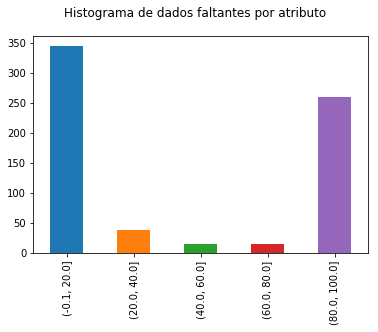

In [10]:
dataframe_missing_collum['Merge_mulher']
#Histogram 

pd.cut(dataframe_missing_collum, 5).value_counts().sort_index().plot.bar()
pl.suptitle("Histograma de dados faltantes por atributo")


In [7]:
dataframe_missing_collum

REC$TYPE             0.000000
DOMICILIO_ID         0.000000
MULHER_ID            0.000000
Merge_mulher       100.000000
CM000_NQUE           0.000000
CM000A_QUES          0.000000
CM002_CONG           0.000000
CM003_ESTR           0.000000
CM004_MACR           0.000000
CM008_SITU           0.000000
CM021_LINH           0.000000
CM023_DATA_ENTR      0.000000
M102_IDAD            0.000000
M103_ONDE            0.000000
M104_TEMP            0.000000
M105_LER             0.000000
M106_ESCU            0.000000
M107_ASSI            0.000000
M108_RELI            0.000000
M109_RELI            0.000000
M110_SERV            0.000000
M111_COR             0.000000
M112_CONV            0.000000
M113_TITU           81.504702
M114_FILH            0.000000
M115A_LINH          99.686520
M115B_LINH         100.000000
M115C_LINH         100.000000
M115D_LINH         100.000000
M115E_LINH         100.000000
                      ...    
M714_TRAB           31.347962
M715_DECI           31.347962
M716_PORC 

## Counting 9* values

In [8]:
#Função para porcentagem de dados faltantes:
def num_outvalues(x, size):
    list_values = [95, 97,98, 99, 999999, 999995, 999997, 999998, 9995, 9998, 9997]
    outvalues = set(list_values)
    total = 0
    for y in x:
        if y in outvalues:
            total = total + 1
    return ((total*100)/size)
    #return sum(x.str.contains('|'.join(outvalues),regex=True))*100/size 

#Aplica por coluna:
print ("99* values per column:")
dataframe_outvalues_collum = dataframe.apply(num_outvalues, axis=0, size = dataframe.shape[0])
print (dataframe_outvalues_collum) #axis=0 define que a função deve ser aplicada em cada coluna

#Aplica por linha:
print ("\n99* values per row:")
dataframe_outvalues_row = dataframe.apply(num_outvalues, axis=1, size = dataframe.shape[1])
print (dataframe_outvalues_row) #axis=1define que a função deve ser aplicada em cada linha

#dataframe_outvalues_collum.sort_values()
#dataframe_outvalues_collum['M30207_CONH']

99* values per column:
REC$TYPE            0.000000
DOMICILIO_ID        0.000000
MULHER_ID           0.000000
Merge_mulher        0.000000
CM000_NQUE          0.000000
CM000A_QUES         0.000000
CM002_CONG          0.313480
CM003_ESTR          0.000000
CM004_MACR          0.000000
CM008_SITU          0.000000
CM021_LINH          0.000000
CM023_DATA_ENTR     0.000000
M102_IDAD           0.000000
M103_ONDE           0.000000
M104_TEMP          32.915361
M105_LER            0.000000
M106_ESCU           0.000000
M107_ASSI           0.000000
M108_RELI           0.000000
M109_RELI           0.000000
M110_SERV           0.940439
M111_COR            0.626959
M112_CONV           0.313480
M113_TITU           0.000000
M114_FILH           0.000000
M115A_LINH          0.000000
M115B_LINH          0.000000
M115C_LINH          0.000000
M115D_LINH          0.000000
M115E_LINH          0.000000
                     ...    
M714_TRAB           0.000000
M715_DECI           0.000000
M716_PORC           

Text(0.5,0.98,'Histograma de valores 9*')

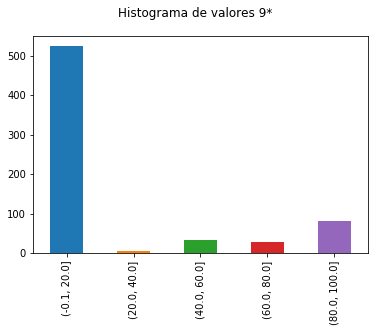

In [9]:
#Histogram 
import pylab as pl
pd.cut(dataframe_outvalues_collum, 5).value_counts().sort_index().plot.bar()
pl.suptitle("Histograma de valores 9*")


## Removing columns high missing rate

In [11]:
#order columns by missing hate
dataframe_missing_ordered = dataframe_missing_collum.sort_values(ascending=False)

#select all columns with more than X value of missing rate (80% for this case)
dataframe_missing_ordered = dataframe_missing_ordered.loc[dataframe_missing_ordered > 80]
#dataframe_missing_ordered

In [12]:
dataframe_missing_ordered

M115D_LINH      100.000000
M115B_LINH      100.000000
M50903_PRET     100.000000
M50904_MEDO     100.000000
M50905_MEDO     100.000000
M50996_OUTR     100.000000
M50998_NAO      100.000000
M22041_FOLI     100.000000
M50999_RECU     100.000000
M22042_FOLI     100.000000
M115C_LINH      100.000000
M221B_FOLI      100.000000
M224_NUNC       100.000000
M50901_NAO      100.000000
M50902_NAO      100.000000
M614_QUAN       100.000000
M115E_LINH      100.000000
M22031_FOLI     100.000000
Merge_mulher    100.000000
M22022_FOLI     100.000000
M618_UTIL       100.000000
M22021_FOLI     100.000000
M617_RAZA       100.000000
M21902_FARM      99.686520
M22002_FERR      99.686520
M22013_FERR      99.686520
M22015_FERR      99.686520
M21905_ONDE      99.686520
M21906_MUIT      99.686520
M21996_OUTR      99.686520
                   ...    
M606B14_NAO      84.952978
M606B10_SE       84.952978
M606B13_MOTI     84.952978
M606B12_OUTR     84.952978
M606B11_COMP     84.952978
M606B16_PROB     84.952978
M

In [13]:
columns_to_remove = dataframe_missing_ordered.index.get_values().tolist()
dataframe_clean = dataframe.drop(columns_to_remove, inplace=False, axis=1)
print("Original size ", dataframe.shape, "Before cleaned", dataframe_clean.shape)
dataframe_clean

Original size  (319, 675) Before cleaned (319, 415)


,REC$TYPE,DOMICILIO_ID,MULHER_ID,CM000_NQUE,CM000A_QUES,CM002_CONG,CM003_ESTR,CM004_MACR,CM008_SITU,CM021_LINH,...,M840B_ALTU,XM010_SITU,XM020_NUME,XM110_PESO,XM120_ALTU,XM130_CIRC,XM210_RETI,XM220_HEMO,XM999_PESO,FatorMulheres
7,210,1100080,110008002,10008002,100080,1,1,1,1,2,...,148.1,3,1,41.8,148.2,66.8,1.18,13.29,1.337.187.856,0.397748695
18,210,2100180,210018002,10018002,100180,2,1,1,1,2,...,149.4,2,1,39.3,149.4,65.8,9.99,99.99,288.180.641,0.085719799
58,210,5100490,510049002,10049002,100490,5,1,1,1,2,...,152.4,2,1,55.8,152.4,85.3,0.90,11.49,2.254.941.564,0.670736023
78,210,6100680,610068002,10068002,100680,6,1,1,1,2,...,150.5,3,1,62.1,150.6,92.8,1.56,13.61,421.371.783,0.12533772
81,210,6100700,610070002,10070002,100700,6,1,1,1,2,...,153.3,2,1,53.3,153.4,78.8,9.99,99.99,338.496.548,0.100686347
105,210,8100900,810090005,10090005,100900,8,1,1,1,5,...,160.1,3,1,55.5,160.1,74.8,1.04,12.61,1.031.679.542,0.306874752
153,210,11101310,1110131002,10131002,101310,11,1,1,1,2,...,155.7,5,2,63.1,155.6,84.3,9.99,99.99,2.023.744.533,0.601966092
159,210,12101350,1210135003,10135003,101350,12,1,1,1,3,...,165.5,1,1,70.1,165.6,88.3,9.99,99.99,1.205.525.246,0.358585438
167,210,12101420,1210142002,10142002,101420,12,1,1,1,2,...,147.1,3,1,46.6,147.1,70.8,9.99,99.99,956.729.064,0.284580611
171,210,13101460,1310146002,10146002,101460,13,1,1,1,2,...,156.1,2,1,85.1,156.1,101.8,9.99,99.99,1.718.284.151,0.511106406


## Removing columns with high outvalues

In [14]:
#order columns by missing hate
dataframe_outvalues_ordered = dataframe_outvalues_collum.sort_values(ascending=False)

#select all columns with more than X value of missing rate (80% for this case)
dataframe_outvalues_ordered = dataframe_outvalues_ordered.loc[dataframe_outvalues_ordered > 80]
dataframe_outvalues_ordered

M31903_PROF    100.000000
M31906_SEM     100.000000
M31901_NAO     100.000000
M31902_ESQU    100.000000
M31996_OUTR    100.000000
M31904_COMP    100.000000
M31905_DIFI    100.000000
M305_TENT       99.373041
M32096_OUTR     99.059561
M32002_MUIT     99.059561
M32003_MARI     99.059561
M32005_TEMP     99.059561
M32004_MENS     99.059561
M384_NAO        99.059561
M32001_FICO     99.059561
M382_AOND       98.746082
M383_RESU       98.746082
M318_PILU       98.746082
M363_MOTI       98.432602
M381_AJUD       97.805643
M325_ONDE       97.178683
M30396_USOU     96.238245
M33196_OUTR     96.238245
M33107_SEM      96.238245
M33106_TEMP     96.238245
M33105_FICO     96.238245
M33104_NAO      96.238245
M33101_MENS     96.238245
M33103_RAZO     96.238245
M33102_ESQU     96.238245
                  ...    
M33703_PROB     88.714734
M33796_OUTR     88.714734
M33702_MUIT     88.714734
M317_ORDE       87.147335
M37998_NAO      86.833856
M37996_OUTR     86.833856
M37904_FARM     86.833856
M37901_SUS  

In [15]:
columns_to_remove = dataframe_outvalues_ordered.index.get_values().tolist()
dataframe_clean = dataframe_clean.drop(columns_to_remove, inplace=False, axis=1)
print("Original size ", dataframe.shape, "Before cleaned again", dataframe_clean.shape)
dataframe_clean

Original size  (319, 675) Before cleaned again (319, 333)


,REC$TYPE,DOMICILIO_ID,MULHER_ID,CM000_NQUE,CM000A_QUES,CM002_CONG,CM003_ESTR,CM004_MACR,CM008_SITU,CM021_LINH,...,M840B_ALTU,XM010_SITU,XM020_NUME,XM110_PESO,XM120_ALTU,XM130_CIRC,XM210_RETI,XM220_HEMO,XM999_PESO,FatorMulheres
7,210,1100080,110008002,10008002,100080,1,1,1,1,2,...,148.1,3,1,41.8,148.2,66.8,1.18,13.29,1.337.187.856,0.397748695
18,210,2100180,210018002,10018002,100180,2,1,1,1,2,...,149.4,2,1,39.3,149.4,65.8,9.99,99.99,288.180.641,0.085719799
58,210,5100490,510049002,10049002,100490,5,1,1,1,2,...,152.4,2,1,55.8,152.4,85.3,0.90,11.49,2.254.941.564,0.670736023
78,210,6100680,610068002,10068002,100680,6,1,1,1,2,...,150.5,3,1,62.1,150.6,92.8,1.56,13.61,421.371.783,0.12533772
81,210,6100700,610070002,10070002,100700,6,1,1,1,2,...,153.3,2,1,53.3,153.4,78.8,9.99,99.99,338.496.548,0.100686347
105,210,8100900,810090005,10090005,100900,8,1,1,1,5,...,160.1,3,1,55.5,160.1,74.8,1.04,12.61,1.031.679.542,0.306874752
153,210,11101310,1110131002,10131002,101310,11,1,1,1,2,...,155.7,5,2,63.1,155.6,84.3,9.99,99.99,2.023.744.533,0.601966092
159,210,12101350,1210135003,10135003,101350,12,1,1,1,3,...,165.5,1,1,70.1,165.6,88.3,9.99,99.99,1.205.525.246,0.358585438
167,210,12101420,1210142002,10142002,101420,12,1,1,1,2,...,147.1,3,1,46.6,147.1,70.8,9.99,99.99,956.729.064,0.284580611
171,210,13101460,1310146002,10146002,101460,13,1,1,1,2,...,156.1,2,1,85.1,156.1,101.8,9.99,99.99,1.718.284.151,0.511106406


## Removing columns with low added value by manual analysis

In [16]:
columns_to_remove = ['REC$TYPE', 'DOMICILIO_ID','MULHER_ID', 'CM000_NQUE', 'CM000A_QUES', 'CM002_CONG','XM999_PESO', 'CM023_DATA_ENTR', 'M837_DATA_ANTR', 'FatorMulheres']
dataframe_clean_final = dataframe_clean.drop(columns_to_remove, inplace=False, axis=1)
print("Original size ", dataframe.shape, "Before cleaned again", dataframe_clean_final.shape)


Original size  (319, 675) Before cleaned again (319, 323)


## Saving to csv file

In [ ]:
dataframe_clean_final.to_csv("dataset_clean.csv", encoding='utf-8', index=False)

# Preparing data to clusterization

# K-means

## Preparing to k-means

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline
import pylab as pl

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [ ]:
df  = pd.read_csv('dataset_clean_separado.csv')

kmeans = KMeans(n_clusters=4).fit(df.fillna(0))
centroids = kmeans.cluster_centers_

In [ ]:
plt.scatter(df['M102_IDAD'], df['M282_ABOR'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 4], centroids[:, 1], c='red', s=100)
plt.title('Clusterização k-means 4 clusters')
plt.xlabel('M102_IDAD')
plt.ylabel('M282_ABOR')
plt.legend()

plt.show()

## Elbow


In [ ]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print i,kmeans.inertia_
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [ ]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
# Importing the dataset
data = pd.read_csv('dataset_clean_separado.csv')
print(data.shape)
data.head()

In [ ]:
# Getting the values and plotting it
f1 = data['M102_IDAD'].values
f2 = data['M501_CASA'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')